# Numpy-only 2-layer Neural Network for Binary Classification

### Imports 

In [1]:
# Import libraries
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from neural_net import NeuralNet
import numpy as np

## Using UCI Heart Disease Dataset

In [2]:
# Define header names

headers = ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

# Make DF

heart_df = pd.read_csv('Data/heart.dat', sep = ' ', names = headers)

In [3]:
# Check shape of DF

heart_df.shape

(270, 14)

In [4]:
# Check for na's

heart_df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [5]:
# Check datatypes

heart_df.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object

In [6]:
# Define training set

X = heart_df.drop(columns = ['heart_disease'])

# Enumerate target class i.e. labels
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1,0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2,1)

y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)

# Make train-test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size = 0.2, random_state = 2)

In [7]:
# Scale values

sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (216, 13)
Shape of test set is (54, 13)
Shape of train label is (216, 1)
Shape of test labels is (54, 1)


### Train Model and Use it to Predict

In [8]:
# Instantiate class of Neural Net using default parameters

nn = NeuralNet()

In [9]:
# Fit model

nn.fit(Xtrain, ytrain)

Training epoch 1, calculated loss: 1.406818099455712
Training epoch 2, calculated loss: 1.2283644538724772
Training epoch 3, calculated loss: 1.1027579343396263
Training epoch 4, calculated loss: 1.010277834670556
Training epoch 5, calculated loss: 0.9375456811690593
Training epoch 6, calculated loss: 0.8771342674193834
Training epoch 7, calculated loss: 0.8256029193292977
Training epoch 8, calculated loss: 0.7809976438171825
Training epoch 9, calculated loss: 0.7419983603962279
Training epoch 10, calculated loss: 0.707447080573352
Training epoch 11, calculated loss: 0.6761308099914313
Training epoch 12, calculated loss: 0.6479719529677453
Training epoch 13, calculated loss: 0.6225758410329949
Training epoch 14, calculated loss: 0.5995873203513066
Training epoch 15, calculated loss: 0.5787978131048888
Training epoch 16, calculated loss: 0.5599182115487729
Training epoch 17, calculated loss: 0.5427118970422696
Training epoch 18, calculated loss: 0.5270878681118275
Training epoch 19, cal

Training epoch 255, calculated loss: 0.2003377703110201
Training epoch 256, calculated loss: 0.1999290356881397
Training epoch 257, calculated loss: 0.19954320203371445
Training epoch 258, calculated loss: 0.199182485115241
Training epoch 259, calculated loss: 0.19880105043699905
Training epoch 260, calculated loss: 0.19840192422729222
Training epoch 261, calculated loss: 0.1980207292858923
Training epoch 262, calculated loss: 0.19764848083957062
Training epoch 263, calculated loss: 0.19726230645401954
Training epoch 264, calculated loss: 0.19688050465637108
Training epoch 265, calculated loss: 0.19651275770998625
Training epoch 266, calculated loss: 0.19612384179538422
Training epoch 267, calculated loss: 0.1957630147609834
Training epoch 268, calculated loss: 0.1953722569566314
Training epoch 269, calculated loss: 0.19498930212044344
Training epoch 270, calculated loss: 0.19461641793214018
Training epoch 271, calculated loss: 0.1942441575982174
Training epoch 272, calculated loss: 0.

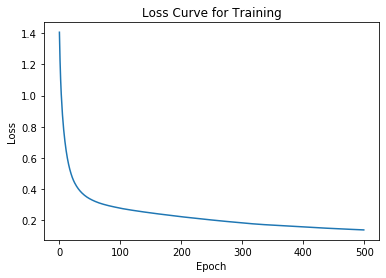

In [10]:
# Plot model loss

nn.plot_loss(imagepath="Images/heart_disease_model1.png")

In [11]:
# Use models to predict

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

In [12]:
# Get accuracy of predictions

print("Train accuracy is {}%".format(nn.accuracy(ytrain, train_pred)))
print("Test accuracy is {}%".format(nn.accuracy(ytest, test_pred)))

Train accuracy is 94%
Test accuracy is 68%


## Using Banknote Authentication Dataset

In [13]:
# Read in dataframe

banknote_df = pd.read_csv('Data/data_banknote_authentication.txt', sep = ',', names = ['variance', 'skewness', 'kurtosis', 'entropy', 'classification'])

In [14]:
# Check shape of DF

banknote_df.shape

(1372, 5)

In [15]:
# Check for na's

banknote_df.isna().sum()

variance          0
skewness          0
kurtosis          0
entropy           0
classification    0
dtype: int64

In [16]:
# Check datatypes

banknote_df.dtypes

variance          float64
skewness          float64
kurtosis          float64
entropy           float64
classification      int64
dtype: object

In [17]:
# Define training set

X2 = banknote_df.drop(columns = ['classification'])

y_label2 = banknote_df['classification'].values.reshape(X2.shape[0], 1)

# Make train-test split
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y_label2, test_size = 0.2, random_state = 2)

In [19]:
# Scale Data

sc.fit(Xtrain2)
Xtrain2 = sc.transform(Xtrain2)
Xtest2 = sc.transform(Xtest2)

print(f"Shape of train set is {Xtrain2.shape}")
print(f"Shape of test set is {Xtest2.shape}")
print(f"Shape of train label is {ytrain2.shape}")
print(f"Shape of test labels is {ytest2.shape}")

Shape of train set is (1097, 4)
Shape of test set is (275, 4)
Shape of train label is (1097, 1)
Shape of test labels is (275, 1)


In [20]:
# Define new neural network model with layers corresponding to input dimensions of 4

nn2 = NeuralNet(layers=[4, 5, 1])

In [21]:
# Fit new model 

nn2.fit(Xtrain2, ytrain2)

Training epoch 1, calculated loss: 1.5543208674243605
Training epoch 2, calculated loss: 1.0206359831199538
Training epoch 3, calculated loss: 1.0457455064409347
Training epoch 4, calculated loss: 0.68995373571536
Training epoch 5, calculated loss: 0.6397701113244398
Training epoch 6, calculated loss: 0.541329566993813
Training epoch 7, calculated loss: 0.4659455632611285
Training epoch 8, calculated loss: 0.3925161037720746
Training epoch 9, calculated loss: 0.3346998923982945
Training epoch 10, calculated loss: 0.29078823986940117
Training epoch 11, calculated loss: 0.2562930989024405
Training epoch 12, calculated loss: 0.2282851319826521
Training epoch 13, calculated loss: 0.20488885261056808
Training epoch 14, calculated loss: 0.1851624968060071
Training epoch 15, calculated loss: 0.16851992047006334
Training epoch 16, calculated loss: 0.15451366892854068
Training epoch 17, calculated loss: 0.14271935539455005
Training epoch 18, calculated loss: 0.1327178585577677
Training epoch 19

Training epoch 278, calculated loss: 0.020115372937426216
Training epoch 279, calculated loss: 0.02007715507788205
Training epoch 280, calculated loss: 0.020039130259555525
Training epoch 281, calculated loss: 0.020001296627910566
Training epoch 282, calculated loss: 0.019963727902689618
Training epoch 283, calculated loss: 0.019926469696129937
Training epoch 284, calculated loss: 0.019889399057232634
Training epoch 285, calculated loss: 0.01985250867954502
Training epoch 286, calculated loss: 0.01981578902672583
Training epoch 287, calculated loss: 0.019779244544301487
Training epoch 288, calculated loss: 0.01974287469919798
Training epoch 289, calculated loss: 0.019706668368943078
Training epoch 290, calculated loss: 0.01967061229883547
Training epoch 291, calculated loss: 0.01963472790177622
Training epoch 292, calculated loss: 0.019599015432734384
Training epoch 293, calculated loss: 0.01956352693739724
Training epoch 294, calculated loss: 0.01952820511825909
Training epoch 295, ca

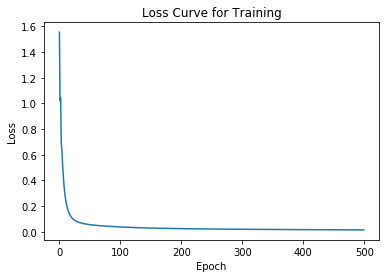

In [22]:
# Plot loss 

nn2.plot_loss(imagepath="Images/bank_note_model1.png")

In [23]:
# Use models to predict

train_pred2 = nn2.predict(Xtrain2)
test_pred2 = nn2.predict(Xtest2)

In [24]:
# Get accuracy of predictions

print("Train accuracy is {}%".format(nn2.accuracy(ytrain2, train_pred2)))
print("Test accuracy is {}%".format(nn2.accuracy(ytest2, test_pred2)))

Train accuracy is 99%
Test accuracy is 97%


## Using Sonar Dataset

In [25]:
# Read in dataframe

sonar_df = pd.read_csv('Data/sonar.all-data', header=None, names = ['variable {}'.format(i) for i in range(0,60)])

In [26]:
# Check shape of DF

sonar_df.shape

(208, 60)

In [27]:
# Define training set

X3 = np.array(sonar_df.drop(columns = ['variable 59']))

sonar_df['variable 59'] = sonar_df['variable 59'].replace({'R': 0, 'M': 1})

y_label3 = sonar_df['variable 59'].values.reshape(X3.shape[0], 1)

# Make train-test split
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X3, y_label3, test_size = 0.3, random_state = 2)

In [33]:
# Define new neural network model with layers corresponding to input dimensions of 59 variables

nn3 = NeuralNet(layers=[59, 59, 1])

In [34]:
# Fit model

nn3.fit(Xtrain3, ytrain3)

Training epoch 1, calculated loss: 11.286649803449817
Training epoch 2, calculated loss: 5.2228808340986905
Training epoch 3, calculated loss: 9.855243103494132
Training epoch 4, calculated loss: 3.5142809761457268
Training epoch 5, calculated loss: 9.512801962440474
Training epoch 6, calculated loss: 4.601342669146589
Training epoch 7, calculated loss: 8.836636601398274
Training epoch 8, calculated loss: 5.268092593009029
Training epoch 9, calculated loss: 7.323014717570067
Training epoch 10, calculated loss: 6.974537198867016
Training epoch 11, calculated loss: 4.029607617475905
Training epoch 12, calculated loss: 6.683009814270618
Training epoch 13, calculated loss: 3.7493159638812137
Training epoch 14, calculated loss: 6.228103213316503
Training epoch 15, calculated loss: 3.79748741750229
Training epoch 16, calculated loss: 6.111327610215748
Training epoch 17, calculated loss: 3.2189704273540802
Training epoch 18, calculated loss: 5.229797819997524
Training epoch 19, calculated los

Training epoch 231, calculated loss: 0.20051965968125543
Training epoch 232, calculated loss: 0.20017513289757488
Training epoch 233, calculated loss: 0.19941856018219123
Training epoch 234, calculated loss: 0.19907272092458694
Training epoch 235, calculated loss: 0.1984425089409663
Training epoch 236, calculated loss: 0.19792930808384798
Training epoch 237, calculated loss: 0.19743158836426347
Training epoch 238, calculated loss: 0.19701726894695681
Training epoch 239, calculated loss: 0.196503476844018
Training epoch 240, calculated loss: 0.1961529527168602
Training epoch 241, calculated loss: 0.19559805130860086
Training epoch 242, calculated loss: 0.19527906831551486
Training epoch 243, calculated loss: 0.19467722350918837
Training epoch 244, calculated loss: 0.19417612512611243
Training epoch 245, calculated loss: 0.19370789839484506
Training epoch 246, calculated loss: 0.19340602570497104
Training epoch 247, calculated loss: 0.19278209747514874
Training epoch 248, calculated loss

Training epoch 450, calculated loss: 0.12430045675313199
Training epoch 451, calculated loss: 0.1240928424014099
Training epoch 452, calculated loss: 0.12387140123059924
Training epoch 453, calculated loss: 0.12367567592512277
Training epoch 454, calculated loss: 0.12341540623891381
Training epoch 455, calculated loss: 0.1231732991851178
Training epoch 456, calculated loss: 0.12296889712604749
Training epoch 457, calculated loss: 0.1227277772425056
Training epoch 458, calculated loss: 0.12247115378966125
Training epoch 459, calculated loss: 0.12226740554059927
Training epoch 460, calculated loss: 0.1220379751454405
Training epoch 461, calculated loss: 0.12189774264761284
Training epoch 462, calculated loss: 0.12165504742985678
Training epoch 463, calculated loss: 0.12145132761442175
Training epoch 464, calculated loss: 0.12124390451675353
Training epoch 465, calculated loss: 0.1210414657986651
Training epoch 466, calculated loss: 0.12079873470193989
Training epoch 467, calculated loss:

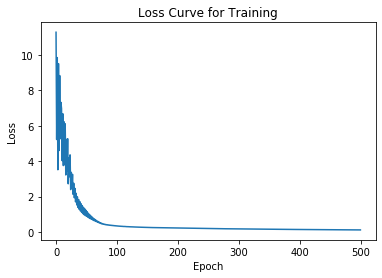

In [35]:
# Plot loss

nn3.plot_loss(imagepath="Images/sonar_dataset_model1.png")

In [36]:
# Use models to predict

train_pred3 = nn3.predict(Xtrain3)
test_pred3 = nn3.predict(Xtest3)

In [37]:
# Get accuracy of predictions

print("Train accuracy is {}%".format(nn3.accuracy(ytrain3, train_pred3)))
print("Test accuracy is {}%".format(nn3.accuracy(ytest3, test_pred3)))

Train accuracy is 98%
Test accuracy is 85%
